In [6]:
import pandas as pd

data = pd.read_csv("estate_data.csv")
print(data.head(15))

    number_of_rooms  floor  area         address           date   price
0                 1      1  58.0          Сомони  Сегодня 21:56  330000
1                 1     14  68.0          92 мкр  Сегодня 21:56  340000
2                 3      8  50.0             NaN  Сегодня 21:55  700000
3                 3     14  84.0         112 мкр  Сегодня 21:51  700000
4                 3      3  83.0   фабрика Ширин  Сегодня 21:48  415000
5                 3      4  53.0          32 мкр  Сегодня 21:42  513000
6                 2     12  67.0        И.Сомони  Сегодня 21:39  360000
7                 2      4  52.0             NaN  Сегодня 21:32  397000
8                 2      7  95.0             NaN  Сегодня 21:14  499000
9                 2     15  73.0  якум советский  Сегодня 21:14  450000
10                1     16  47.0             NaN  Сегодня 21:07  395000
11                2     15  52.0        Зарафшон  Сегодня 21:06  370000
12                1      4  50.0            Сино  Сегодня 21:05 

In [7]:
data.shape

(5579, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   number_of_rooms  5579 non-null   int64  
 1   floor            5579 non-null   int64  
 2   area             5579 non-null   float64
 3   address          4773 non-null   object 
 4   date             5579 non-null   object 
 5   price            5579 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 261.6+ KB


In [9]:
data.describe()

,number_of_rooms,floor,area,price
count,5579.000000,5579.000000,5579.000000,5.579000e+03
mean,2.502420,7.106291,78.076358,5.840748e+05
std,1.228378,4.577408,38.749944,4.129821e+05
min,1.000000,0.000000,16.000000,3.900000e+02
25%,2.000000,3.000000,50.000000,3.430000e+05
50%,2.000000,6.000000,68.000000,4.850000e+05
75%,3.000000,10.000000,93.000000,7.000000e+05
max,6.000000,23.000000,370.000000,8.814000e+06


In [10]:
data.columns

Index(['number_of_rooms', 'floor', 'area', 'address', 'date', 'price'], dtype='object')

In [16]:
data.drop("date", axis = 1, inplace = True)

data.head()

KeyError: "['date'] not found in axis"

In [17]:
import numpy as np
numeric = data.select_dtypes(include=np.number)
category = data.select_dtypes(include='object')
print(numeric.columns)
print(category.columns)

Index(['number_of_rooms', 'floor', 'area', 'price'], dtype='object')
Index(['address'], dtype='object')


This is for: address


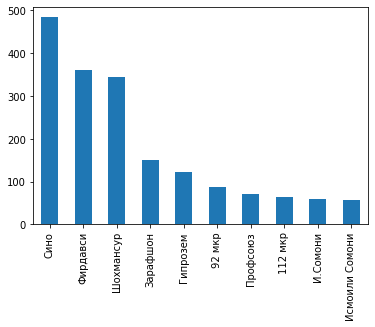

In [18]:
import matplotlib.pyplot as plt
# % matplotlib inline

for i in category.columns:
    print("This is for: "+i)
    data[i].value_counts().nlargest(10).plot.bar()
    plt.show()

this it for: number_of_rooms


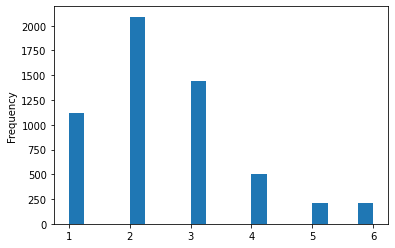

this it for: floor


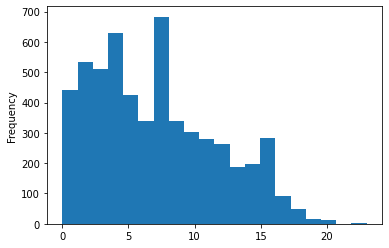

this it for: area


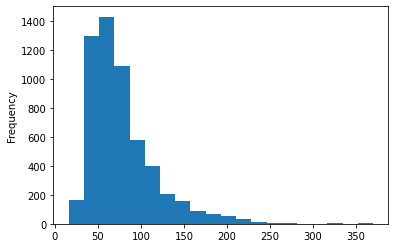

this it for: price


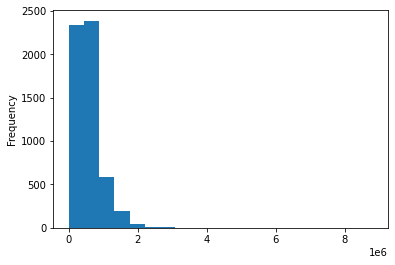

In [19]:
for i in numeric:
    print("this it for: " + i)
    data[i].plot.hist(bins=20)
    plt.show()


In [20]:
for i in numeric:
    print("this it for: " + i)
    print(data[i].isna().sum())

print("Categorical data")
for i in category:
    print("this it for: " + i)
    print(data[i].isna().sum())

this it for: number_of_rooms
0
this it for: floor
0
this it for: area
0
this it for: price
0
Categorical data
this it for: address
806


In [21]:
# data = data.dropna()
# data.head(20)
# data.shape

In [22]:
for i in data:
    print("this it for: " + i)
    print(data[i].isna().sum())

this it for: number_of_rooms
0
this it for: floor
0
this it for: area
0
this it for: address
806
this it for: price
0


In [23]:
from geopy import Nominatim
import numpy as np


not_found = [np.nan]
def geoloc(address):
    if pd.isnull(address):
        print(str(address) + " Not found")
        return (np.nan,np.nan)
    if address.split(" ")[0].isnumeric():
        address = address.split(" ")[0].strip()
    if address[-1].isalnum() == False:
        address = address[0:-1]
    if address[0:2] == "н.":
        address = address.split(" ")[0][2:]
    add = str(address)+", Dushanbe, Tajikistan"
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(add)
    if location == None:
        address = address.split(" ")[0]
        add = str(address)+", Dushanbe, Tajikistan"
        locator = Nominatim(user_agent="myGeocoder")
        location = locator.geocode(add)
    if (location is None) :
        not_found.append(address)
        print(address + " Not found")
        return (np.nan,np.nan)
    return (location.latitude,location.longitude)

data["latitude"], data["longitude"] = data["address"].apply(geoloc)

print(data.head(16))

ModuleNotFoundError: No module named 'geopy'

In [31]:
print(not_found)

[nan, 'профсоюз', 'Профсоюз', 'Профсоюз', 'Овир', 'Напротив', 'Караболо', 'Караболо', 'Овир', 'Профсоюз', 'Профсоюз', 'Зелёный', 'Зелёный', 'Сельхозинститут', 'Сельхозинститут', 'профсоюз', 'профсоюз', 'Ориентир', 'Шозмансур', 'Караболо', 'Исмойли', '112мкр', '82мкр', 'Испечак2', 'Караболо', 'Профсоюз', 'Зеленый', 'Зеленый', 'поёни', 'Cадбарг', 'Диагностика', 'Фирдаси', 'Караболо', 'Профсоюз', 'Зеленый', 'Зеленый', '112мкр', 'наздикии', 'Зеленый']


In [37]:
address = "Cадбарг "
add = str(address)+", Dushanbe, Tajikistan"
    # print(add)
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode(add)
print(location)
print(add)
print("Latitude: "+str(location.latitude)+" longitude: "+str(location.longitude))
print("___________________________")

None
Cадбарг supermarket, Dushanbe, Tajikistan


AttributeError: 'NoneType' object has no attribute 'latitude'

In [ ]:
print(data.shape)

(4773, 8)
